In [17]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Dokładność klasyfikacji:  0.9111111111111111


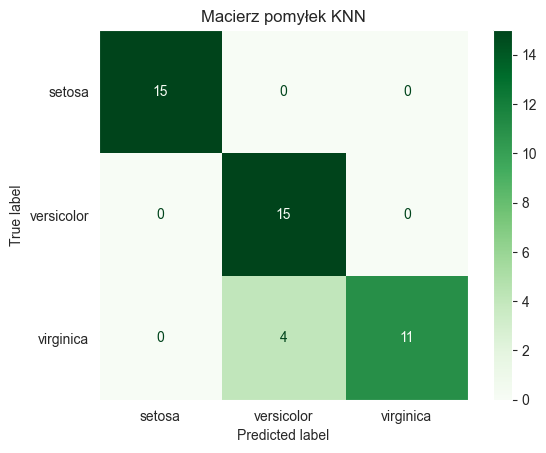

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# podział danych X i y
X = data.data
y = data.target

# podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify = zrównoważone proporcje klass

# standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementacja KNN
model = KNeighborsClassifier(n_neighbors=5)  #tworzenie modelu KNN
model.fit(X_train, y_train)  # trenowanie modelu

# predykcja
y_pred = model.predict(X_test)

# dokładność modelu
print("Dokładność klasyfikacji: ", accuracy_score(y_test, y_pred))

# macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Greens")
plt.title("Macierz pomyłek KNN")
plt.grid(False)
plt.show()

# raport klasyfikacyjny
print(classification_report(y_test, y_pred, target_names=data.target_names))

pętla sprawdzająca branie pod uwagę różnych sąsiadów

Dokładność dla k = 3: 0.9111


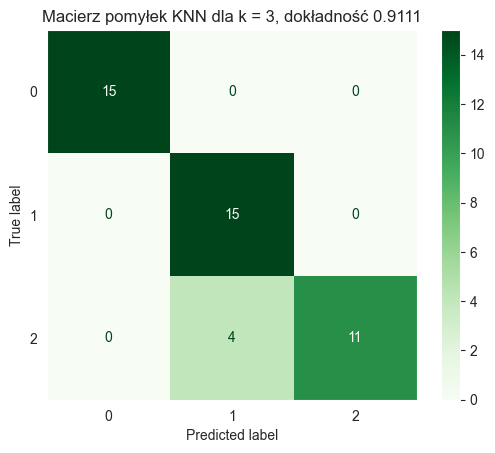

Dokładność dla k = 5: 0.9111


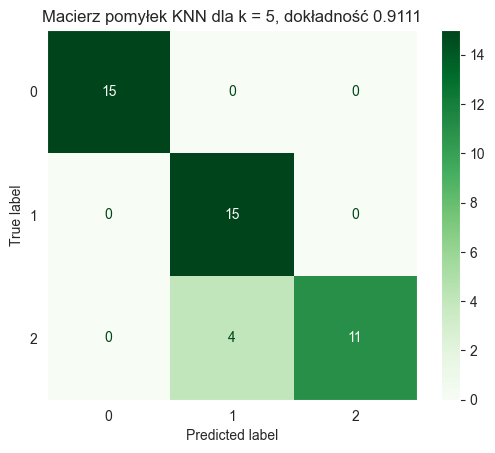

Dokładność dla k = 7: 0.9333


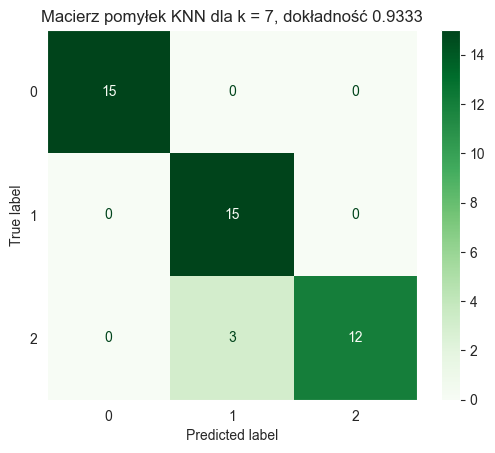

Dokładność dla k = 9: 0.9556


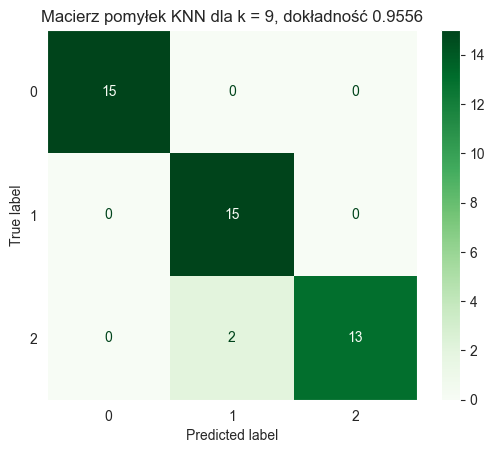

In [48]:
for k in [3,5,7,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność dla k = {k}: {acc:.4f}")

    cm2 = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp.plot(cmap="Greens")
    plt.title(f"Macierz pomyłek KNN dla k = {k}, dokładność {acc:.4f}")
    plt.grid(False)
    plt.show()

Cross-validation

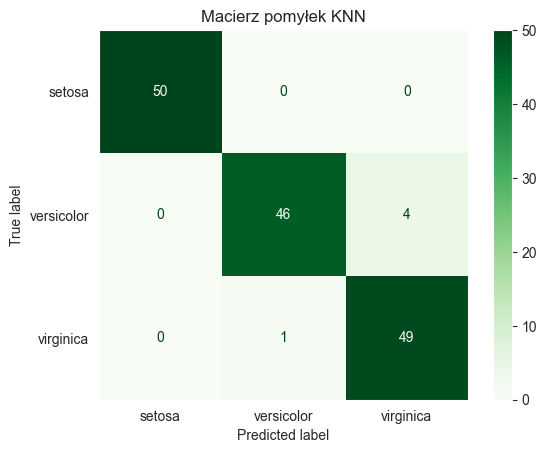

0.9667


In [55]:
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(knn, X, y, cv=10, method='predict')

cm3 = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=data.target_names)
disp.plot(cmap="Greens")
plt.title(f"Macierz pomyłek KNN")
plt.grid(False)
plt.show()

acc3 = accuracy_score(y, y_pred)
print(f"{acc3:.4f}")